In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as sio
from numpy import linalg as LA
from scipy.integrate import quad

In [2]:
x = sio.loadmat('hw06p6a.mat')['x'][:, 0]

In [3]:
def loglikelihood(nu, x):
    return np.sum(np.log(1.0 / (np.pi * (1. + (x - nu)**2))))

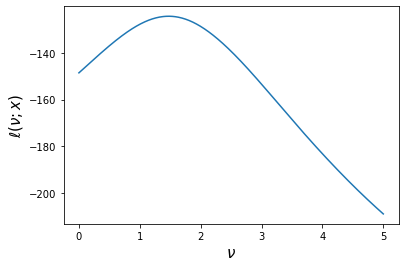

In [4]:
#Part (a)
nu = np.linspace(0, 5, 500)
ell = np.zeros(500)
for i in range(500):
    ell[i] = loglikelihood(nu[i], x)
    
plt.plot(nu, ell)
plt.xlabel(r"$\nu$", size=15)
plt.ylabel(r"$\ell(\nu;x)$", size=15)
plt.savefig('p6a.png')
plt.show()

In [5]:
# first derivative of ell with respect to nu
def ell_prime(nu, x):
    return np.sum((2. * (x - nu)) / (1. + (x - nu)**2))

In [6]:
# binary search for nu_MLE
def MLE(x):
    l = 0.0
    r = 5.0

    while r - l > 1e-4:
        m = (l + r) / 2.

        if ell_prime(m, x) == 0:
            return m

        elif ell_prime(m, x) > 0:
            l = m

        else:
            r = m
    
    return (l + r) / 2.

In [7]:
MLE(x)

1.4743423461914062

In [8]:
# Part (b)
X = sio.loadmat('hw06p6b.mat')['X']

In [9]:
N, Q = X.shape

In [10]:
def sample_mean(x):
    return np.mean(x)

In [11]:
def sample_median(x):
    return np.median(x)

In [12]:
MSE_mean = 0
MSE_median = 0
MSE_mle = 0
nu_0 = 3.

for trial in range(Q):
    MSE_mean += (sample_mean(X[:, trial]) - nu_0)**2
    MSE_median += (sample_median(X[:, trial]) - nu_0)**2
    MSE_mle += (MLE(X[:, trial]) - nu_0)**2
    
print(f"empirical MSE of sample mean: {MSE_mean / Q}")
print(f"empirical MSE of sample median: {MSE_median / Q}")
print(f"empirical MSE of MLE: {MSE_mle / Q}")

empirical MSE of sample mean: 1411.1502882153868
empirical MSE of sample median: 0.05011606306389266
empirical MSE of MLE: 0.0404299513110891


In [13]:
# Part (c):
def integrand(x, nu, nu_0):
    return np.log(1. / (np.pi * (1. + (x - nu)**2))) * (1. / (np.pi * (1. + (x - nu_0)**2)))

In [14]:
nu_0 = 3.
nu = np.linspace(0, 5, 250)
e = np.zeros(250)

for i in range(250):
    e[i] = quad(integrand, -1e+5, 1e+5, args=(nu[i], nu_0,))[0]

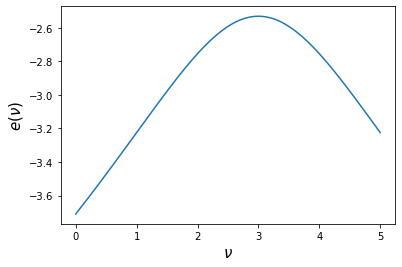

In [15]:
plt.plot(nu, e)
plt.xlabel(r"$\nu$", size=15)
plt.ylabel(r"$e(\nu)$", size=15)
plt.savefig('p6c.png')
plt.show()

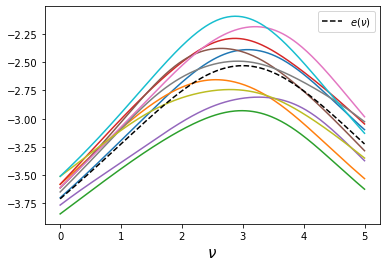

In [16]:
for trial in range(10):
    ell_average = np.zeros(250)
    for i in range(250):
        ell_average[i] = loglikelihood(nu[i], X[:, trial]) / N
    plt.plot(nu, ell_average)

plt.plot(nu, e, '--', color='k', label=r'$e(\nu)$')
plt.xlabel(r"$\nu$", size=15)
plt.legend()
plt.savefig('p6d.png')
plt.show()